## data cleaning and preprocessing

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# check if data have missing values
df_scl = pd.read_csv('data/归一化的100hz SCL特征/merged_scl_features.csv')
df_scr = pd.read_csv('data/100hz SCR 特征/filtered_scr_features_complete.csv')
df_gsr = pd.read_csv('data/100hzGSR特征/all_segments_features.csv')



# 查看哪些是空列，如果有空列，删除空列
null_columns_gsr = df_gsr.columns[df_gsr.isnull().all()]
print(null_columns_gsr)
for i in range(len(null_columns_gsr)):
    df_gsr.drop(null_columns_gsr[i], axis=1, inplace=True)
    


# # if there are missing values, print the columns with missing values
# print(df_scl.columns[df_scl.isnull().any()])
# print(df_scr.columns[df_scr.isnull().any()])
# print(df_gsr.columns[df_gsr.isnull().any()])





# fill missing values with imputation (样条插值)
df_scl = df_scl.interpolate(method='spline', order=3)
df_gsr = df_gsr.interpolate(method='spline', order=3,limit_direction='both')
# 在df_scr里面，如果Segment为1的列，填充这个整个行的空值为0，其他的行用样条插值
df_scr.loc[df_scr['Segment'] == 1] = df_scr.loc[df_scr['Segment'] == 1].fillna(0)
df_scr = df_scr.interpolate(method='spline', order=3,limit_direction='both')


# check if there are still missing values
print(df_scl.columns[df_scl.isnull().any()])
print(df_scr.columns[df_scr.isnull().any()])
print(df_gsr.columns[df_gsr.isnull().any()])




Index(['Spectral Roughness', 'Low-Frequency Power', 'Band Power Ratio (LF/HF)',
       'Maximum Lyapunov Exponent', 'Recurrence Rate', 'Determinism',
       'Spectral Energy Ratio'],
      dtype='object')


C:\Users\16972\AppData\Local\Temp\ipykernel_19592\2847131311.py:32: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df_scl = df_scl.interpolate(method='spline', order=3)
C:\Users\16972\AppData\Local\Temp\ipykernel_19592\2847131311.py:33: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df_gsr = df_gsr.interpolate(method='spline', order=3,limit_direction='both')
C:\Users\16972\AppData\Local\Temp\ipykernel_19592\2847131311.py:36: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df_scr = df_scr.interpolate(method='spline', order=3,limit_direction='both')


Index([], dtype='object')
Index([], dtype='object')
Index([], dtype='object')


## analysis the corelation between the features
- 1. draw the plot of the distribution of the features
- 2. use spearman correlation to analysis the corelation between the features
- 3. use the heatmap to show the corelation between the features



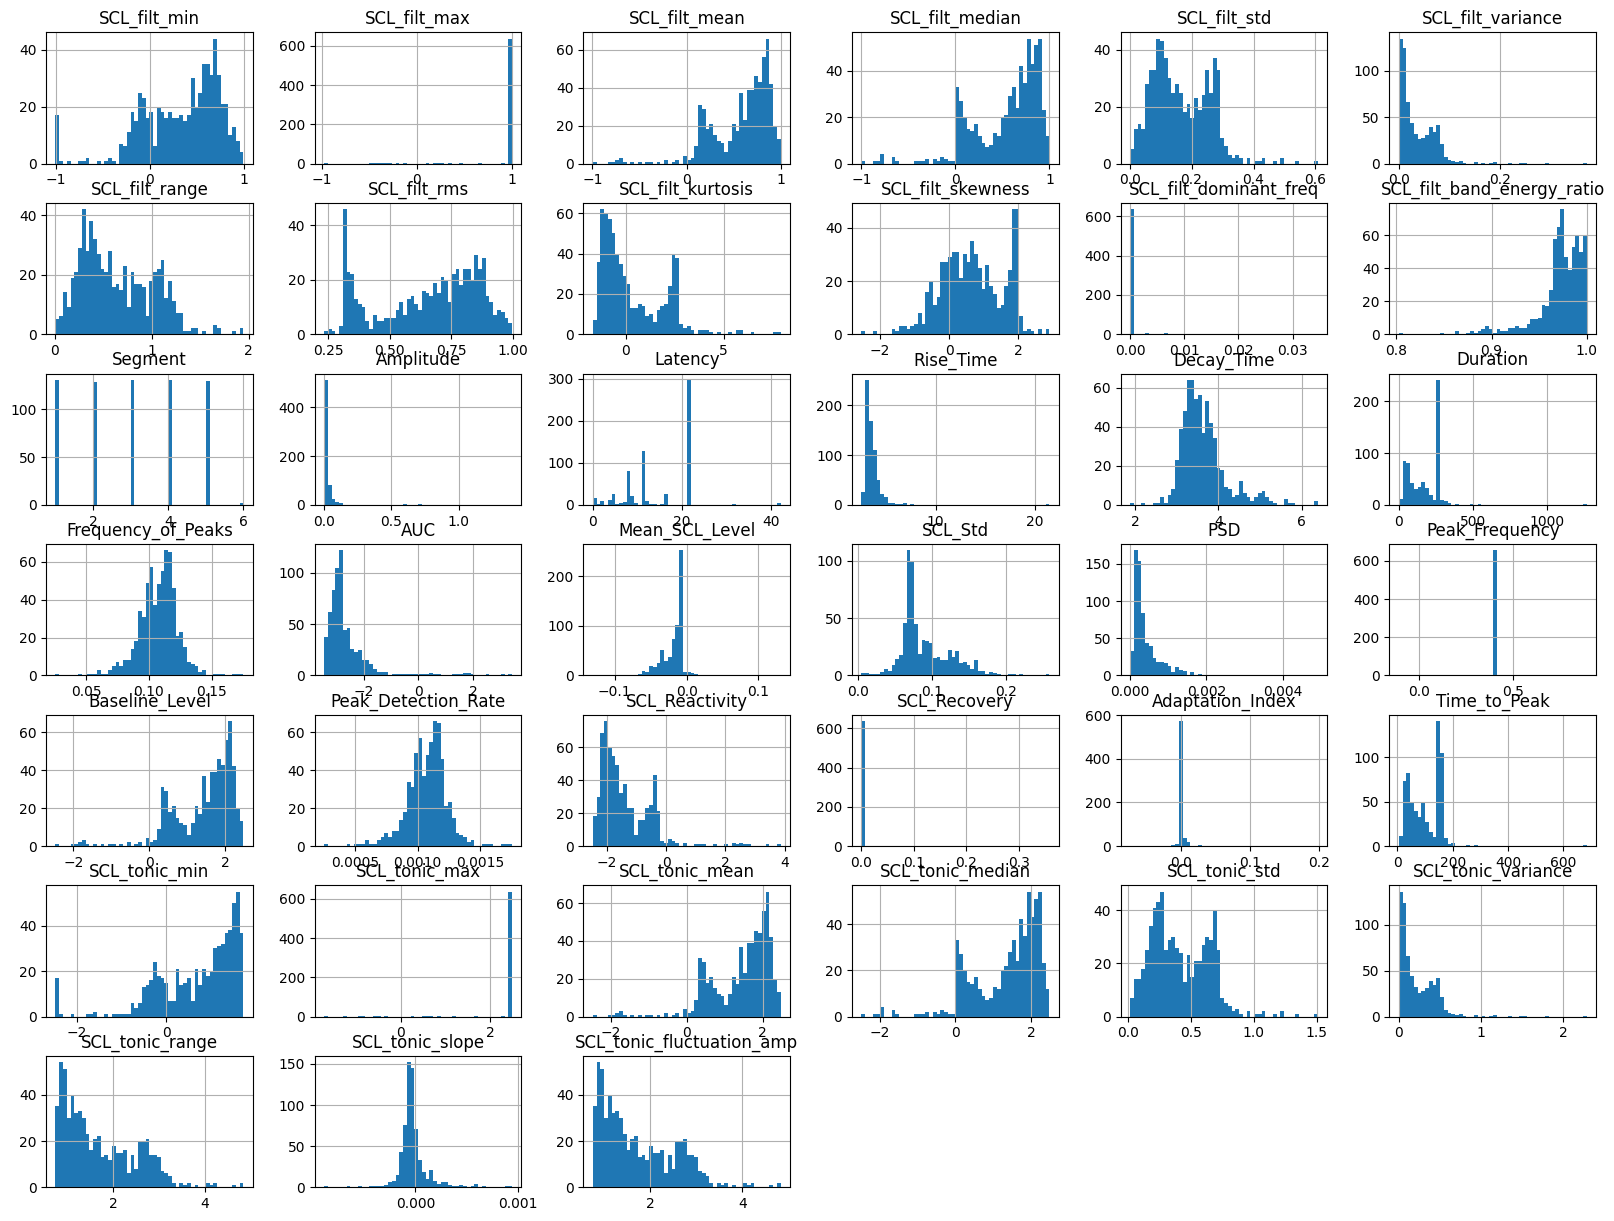

In [3]:
# plot the distribution of the features
df_scl.hist(bins=50, figsize=(20, 15))
plt.show()

In [4]:
# use spearman correlation to check the correlation between features

# missing file is 14030920_100Hz.csv
# drop the row with missing file
df_gsr = df_gsr[df_gsr['File'] != '14030920_100Hz.csv']
df_scl = df_scl[df_scl['File'] != '14030920_100Hz.csv']
df_scr = df_scr[df_scr['File'] != '14030920_100Hz.csv']

print(len(df_gsr['File'].tolist()))

df_gsr = df_gsr[(df_gsr['Segment'] != 2) & (df_gsr['Segment'] != 4)]
df_gsr['Segment'] = df_gsr['Segment'].apply(lambda x: x//2 + 1)



df_scl = df_scl[(df_scl['Segment'] != 2) & (df_scl['Segment'] != 4)]
df_scl['Segment'] = df_scl['Segment'].apply(lambda x: x//2 + 1)

df_scr = df_scr[(df_scr['Segment'] != 2) & (df_scr['Segment'] != 4)]
df_scr['Segment'] = df_scr['Segment'].apply(lambda x: x//2 + 1)


for i in df_gsr['Segment']:
    if i == 4:
        # 删除Segment为4的行
        df_gsr = df_gsr[df_gsr['Segment'] != 4]
    else:
        continue
    
for i in df_scl['Segment']:
    if i == 4:
        # 删除Segment为4的行
        df_scl = df_scl[df_scl['Segment'] != 4]
    else:
        continue
    
for i in df_scr['Segment']:
    if i == 4:
        # 删除Segment为4的行
        df_scr = df_scr[df_scr['Segment'] != 4]
    else:
        continue


# Remove 'File' and 'Segment' columns for correlation analysis
df_scl_corr = df_scl.drop(['File', 'Segment'], axis=1)
df_scr_corr = df_scr.drop(['File', 'Segment'], axis=1)
df_gsr_corr = df_gsr.drop(['File', 'Segment'], axis=1)




# drop the PSD, Cumulative Spectral Energy Distribution, and STFT Energy Spectrum columns
pattern = '|'.join(['PSD', 'Cumulative Spectral Energy Distribution', 'STFT Energy Spectrum'])
df_gsr_corr = df_gsr_corr.drop(df_gsr_corr.columns[df_gsr_corr.columns.str.contains(pattern, regex=True)], axis=1)



# 使用斯皮尔曼相关系数计算特征之间的相关性,主要针对非线性关系
corr_gsr_spear = df_gsr_corr.corr(method='spearman')
corr_scr_spear = df_scr_corr.corr(method='spearman')
corr_scl_spear = df_scl_corr.corr(method='spearman')


# 使用皮尔逊相关系数计算特征之间的相关性,主要针对线性关系
corr_gsr_pear = df_gsr_corr.corr(method='pearson')
corr_scr_pear = df_scr_corr.corr(method='pearson')
corr_scl_pear = df_scl_corr.corr(method='pearson')



# # plot the correlation matrix
# plt.figure(figsize=(12, 12))
# sns.heatmap(corr_gsr, annot=False, cmap='coolwarm')
# plt.title('Correlation Matrix of GSR Features')

# plt.figure(figsize=(12, 12))
# sns.heatmap(corr_scr, annot=False, cmap='coolwarm')
# plt.title('Correlation Matrix of SCR Features')

# plt.figure(figsize=(12, 12))
# sns.heatmap(corr_scl, annot=False, cmap='coolwarm')
# plt.title('Correlation Matrix of SCL Features')


strong_corr_threshold = 0.8

# 将强相关的特征、中等相关的特征、弱相关的特征分别存储在不同的字典
strong_corr_gsr_spear = []
strong_corr_gsr_pear = []
weak_corr_gsr_spear = []
weak_corr_gsr_pear = []
for i in range(len(corr_gsr_spear.columns)):
    for j in range(i):
        if abs(corr_gsr_spear.iloc[i, j]) >= strong_corr_threshold:
            strong_corr_gsr_spear.append((corr_gsr_spear.columns[i], corr_gsr_spear.columns[j]))
        else:
            weak_corr_gsr_spear.append((corr_gsr_spear.columns[i], corr_gsr_spear.columns[j]))            
            
for i in range(len(corr_gsr_pear.columns)):
    for j in range(i):
        if abs(corr_gsr_pear.iloc[i, j]) >= strong_corr_threshold:
            strong_corr_gsr_pear.append((corr_gsr_pear.columns[i], corr_gsr_pear.columns[j]))
        else:
            weak_corr_gsr_pear.append((corr_gsr_pear.columns[i], corr_gsr_pear.columns[j]))
            
            
            
strong_corr_scr_spear = []
strong_corr_scr_pear = []

for i in range(len(corr_scr_spear.columns)):
    for j in range(i):
        if abs(corr_scr_spear.iloc[i, j]) >= strong_corr_threshold:
            strong_corr_scr_spear.append((corr_scr_spear.columns[i], corr_scr_spear.columns[j]))
        else:
            continue
        
for i in range(len(corr_scr_pear.columns)):
    for j in range(i):
        if abs(corr_scr_pear.iloc[i, j]) >= strong_corr_threshold:
            strong_corr_scr_pear.append((corr_scr_pear.columns[i], corr_scr_pear.columns[j]))
        else:
            continue
        
strong_corr_scl_spear = []
strong_corr_scl_pear = []

for i in range(len(corr_scl_spear.columns)):
    for j in range(i):
        if abs(corr_scl_spear.iloc[i, j]) >= strong_corr_threshold:
            strong_corr_scl_spear.append((corr_scl_spear.columns[i], corr_scl_spear.columns[j]))
        else:
            continue
        
for i in range(len(corr_scl_pear.columns)):
    for j in range(i):
        if abs(corr_scl_pear.iloc[i, j]) >= strong_corr_threshold:
            strong_corr_scl_pear.append((corr_scl_pear.columns[i], corr_scl_pear.columns[j]))
        else:
            continue
        
            
            




652


## analysis the corelation between the features and the target
- 1. concat the features and the target
- 2. use spearman correlation to analysis the corelation between the features and the target
- 3. use the hypothesis test to analysis the corelation between the features and the target
- 4. use the heatmap to show the corelation between the features and the target

In [5]:
df_target = pd.read_csv('data/new_table.csv')
df_target = df_target.iloc[:,:17]
df_target.drop('编号', axis=1, inplace=True)
print(df_target.columns)
#rename file to File
df_target.rename(columns={'file':'File'}, inplace=True)

# we concat df_target with df_gsr, df_scr, and df_scl on the 'File' column,df_target的File列是str类型，
#  df_gsr的File列是int类型,然后将df_target的File列的值是属于df_gsr的File列的值（因为df_gsr的File列有其他的值，所以是包含关系）
#  通过正则表达式匹配，将df_gsr的File列的值05010802_100Hz.csv 转换成 5010802 7位数字
import re
df_gsr['File'] = df_gsr['File'].apply(lambda x: int(re.findall(r'\d+', x)[0]))
df_scl['File'] = df_scl['File'].apply(lambda x: int(re.findall(r'\d+', x)[0]))
df_scr['File'] = df_scr['File'].apply(lambda x: int(re.findall(r'\d+', x)[0]))








Index(['file', 'P1', 'A1', 'D1', 'P2', 'A2', 'D2', 'P3', 'A3', 'D3', 'E', 'N',
       'P', 'age', 'sex', '香味'],
      dtype='object')


In [6]:
# 1. 首先将df_target的三个pad的值切分为三行
# 2. 然后将df_gsr, df_scr, df_scl的segment列，如果是2或者4的行删除


transorm_df = pd.DataFrame()
segments = [("P1", "A1", "D1"), ("P2", "A2", "D2"), ("P3", "A3", "D3")]

for i, (p_col,a_col,d_col) in enumerate(segments,start=1):
    temp_df = df_target[['File', p_col, a_col, d_col,'E','N','P','age','sex','香味']].copy()
    temp_df.columns = ['File', 'PP', 'A', 'D','E','N','P','age','sex','香味']
    temp_df['Segment'] = i
    transorm_df = pd.concat([transorm_df, temp_df], ignore_index=True)
    
# 我想把相同file的几行按顺序放在一起
transorm_df = transorm_df.sort_values(by=['File', 'Segment'], ascending=[True, True]).reset_index(drop=True)
# transorm_df.head(10)
transorm_df.head(10)

df_target_gsr = pd.merge(transorm_df, df_gsr, on=['File', 'Segment'], how='inner')
df_target_scr = pd.merge(transorm_df, df_scr, on=['File', 'Segment'], how='inner')
df_target_scl = pd.merge(transorm_df, df_scl, on=['File', 'Segment'], how='inner')





emotion_coordinates = {
    "喜悦": [2.77, 1.21, 1.42],
    "乐观": [2.48, 1.05, 1.75],
    "轻松": [2.19, -0.66, 1.05],
    "惊奇": [1.72, 1.71, 0.22],
    "温和": [1.57, -0.79, 0.38],
    "依赖": [0.39, -0.81, 1.48],
    "无聊": [-0.53, -1.25, -0.84],
    "悲伤": [-0.89, 0.17, -0.70],
    "恐惧": [-0.93, 1.30, -0.64],
    "焦虑": [-0.95, 0.32, -0.63],
    "藐视": [-1.58, 0.32, 1.02],
    "厌恶": [-1.80, 0.40, 0.67],
    "愤懑": [-1.98, 1.10, 0.60],
    "敌意": [-2.08, 1.00, 1.12]
}


# 现在我们通过PAD情感量表，增加一列情感类别'emotion'
def emotion_category(row):
    distances = {}
    for emotion, coordinates in emotion_coordinates.items():
        distance = np.linalg.norm(row[['PP', 'A', 'D']] - coordinates)
        distances[emotion] = distance
    return min(distances, key=distances.get)


df_target_gsr['emotion'] = df_target_gsr.apply(emotion_category, axis=1)
df_target_scr['emotion'] = df_target_scr.apply(emotion_category, axis=1)
df_target_scl['emotion'] = df_target_scl.apply(emotion_category, axis=1)
transorm_df['emotion'] = transorm_df.apply(emotion_category, axis=1)







#### 这一部分主要是拿到两种相关性分析的结果，找到出现频率最高的特征，然后存放到一个列表中，方便后续处理

In [7]:
            
# 现在拿到了强相关的特征，根据他们和目标变量的相关性删除两个特征中的一个

# # Get unique column names from correlation pairs
# unique_columns_pear = set()
# unique_columns_spear = set()

# for col1, col2 in strong_corr_gsr_pear:
# 	unique_columns_pear.add(col1)
# 	unique_columns_pear.add(col2)
 
 
# for col1, col2 in strong_corr_gsr_spear:
# 	unique_columns_spear.add(col1)
# 	unique_columns_spear.add(col2)
 
# File_corr = df_gsr['File'].tolist()
# File = df['File'].tolist()

# # 找到df_gsr_corr和df的补集
# File_corr = set(File_corr)
# File = set(File)
# print(File_corr - File)

# # Filter columns that exist in df_gsr
# unique_columns_pear = [col for col in unique_columns_pear if col in df_gsr.columns]
# unique_columns_spear = [col for col in unique_columns_spear if col in df_gsr.columns]


 
# 查看strong_corr_gsr_pear 和 strong_corr_gsr_spear中的哪些特征出现的最多，然后删除这些特征
# from collections import Counter
# all_features_pear_gsr = [feature for pair in strong_corr_gsr_pear for feature in pair]
# all_features_spear_gsr = [feature for pair in strong_corr_gsr_spear for feature in pair]

# all_features_pear_scr = [feature for pair in strong_corr_scr_pear for feature in pair]
# all_features_spear_scr = [feature for pair in strong_corr_scr_spear for feature in pair]

# all_features_pear_scl = [feature for pair in strong_corr_scl_pear for feature in pair]
# all_features_spear_scl = [feature for pair in strong_corr_scl_spear for feature in pair]

# counter_pear_gsr = Counter(all_features_pear_gsr).most_common(22)
# counter_spear_gsr = Counter(all_features_spear_gsr).most_common(20)
# counter_pear_scr = Counter(all_features_pear_scr).most_common(10)
# counter_spear_scr = Counter(all_features_spear_scr).most_common(8)
# counter_pear_scl = Counter(all_features_pear_scl).most_common(16)
# counter_spear_scl = Counter(all_features_spear_scl).most_common(16)

# # print(counter_spear)
# # print(counter_pear_scr)
# # print(counter_spear_scr)
# # print(counter_pear_scl)
# # print(counter_spear_scl)

# # 找到在counter_pear 和 counter_spear中同时出现最多的特征
# common_features_gsr = set([feature[0] for feature in counter_pear_gsr]).intersection(set([feature[0] for feature in counter_spear_gsr]))
# common_features_scr = set([feature[0] for feature in counter_pear_scr]).intersection(set([feature[0] for feature in counter_spear_scr]))
# common_features_scl = set([feature[0] for feature in counter_pear_scl]).intersection(set([feature[0] for feature in counter_spear_scl]))





#### 这一部分通过分析特征与目标之间的相关性和互信息，来选择特征。我发现相关性普遍很低缺乏线性关系，所以我选择了互信息来选择特征。然后前面拿到了高相关性特征，如果他们和目标之间的互信息也很高，那么我将保留这个特征

In [8]:
# Calculate correlation of unique columns with target variable
# corr_target_pear = df_gsr_corr.corrwith(df['PAD总分'], method='spearman')
# print(corr_target_pear)

from sklearn.feature_selection import mutual_info_classif


print(df_gsr_corr.columns.__len__())
print(df_scr_corr.columns.__len__())
print(df_scl_corr.columns.__len__())

# 计算互信息
mi_gsr = mutual_info_classif(df_gsr_corr, df_target_gsr['emotion'])
mi_series_gsr = pd.Series(mi_gsr, index=df_gsr_corr.columns)

mi_scr = mutual_info_classif(df_scr_corr, df_target_scr['emotion'])
mi_series_scr = pd.Series(mi_scr, index=df_scr_corr.columns)

mi_scl = mutual_info_classif(df_scl_corr, df_target_scl['emotion'])
mi_series_scl = pd.Series(mi_scl, index=df_scl_corr.columns)

print(f"mi_series_gsr is {mi_series_gsr}")

#通过平均值+k*标准差来选择阈值
threshold_gsr = mi_series_gsr.mean() + 1 * mi_series_gsr.std()
print("threshold is ", threshold_gsr)
# 选择互信息大于阈值的特征
selected_features = mi_series_gsr[mi_series_gsr > threshold_gsr].index

threshold_scr = mi_series_scr.mean() + 0.5 * mi_series_scr.std()
print("threshold is ", threshold_scr)
selected_features_scr = mi_series_scr[mi_series_scr > threshold_scr].index

threshold_scl = mi_series_scl.mean() + 0.5* mi_series_scl.std()
print("threshold is ", threshold_scl)
selected_features_scl = mi_series_scl[mi_series_scl > threshold_scl].index




# 在互信息大于阈值的特征中，找到强相关的特征，然后删除其中一个
  
for i in strong_corr_gsr_spear:
    if i[0] in selected_features and i[1] in selected_features:
        if mi_series_gsr[i[0]] > mi_series_gsr[i[1]]:
            selected_features = selected_features.drop(i[1])
        else:
            selected_features = selected_features.drop(i[0])
    else:
        continue
    
for i in strong_corr_gsr_pear:
    if i[0] in selected_features and i[1] in selected_features:
        if mi_series_gsr[i[0]] > mi_series_gsr[i[1]]:
            selected_features = selected_features.drop(i[1])
        else:
            selected_features = selected_features.drop(i[0])
    else:
        continue
    
for i in strong_corr_scr_spear:
    if i[0] in selected_features_scr and i[1] in selected_features_scr:
        if mi_series_scr[i[0]] > mi_series_scr[i[1]]:
            selected_features_scr = selected_features_scr.drop(i[1])
        else:
            selected_features_scr = selected_features_scr.drop(i[0])
    else:
        continue
        
for i in strong_corr_scr_pear:
    if i[0] in selected_features_scr and i[1] in selected_features_scr:
        if mi_series_scr[i[0]] > mi_series_scr[i[1]]:
            selected_features_scr = selected_features_scr.drop(i[1])
        else:
            selected_features_scr = selected_features_scr.drop(i[0])
    else:
        continue
    
for i in strong_corr_scl_spear:
    if i[0] in selected_features_scl and i[1] in selected_features_scl:
        if mi_series_scl[i[0]] > mi_series_scl[i[1]]:
            selected_features_scl = selected_features_scl.drop(i[1])
        else:
            selected_features_scl = selected_features_scl.drop(i[0])
    else:
        continue
        
for i in strong_corr_scl_pear:
    if i[0] in selected_features_scl and i[1] in selected_features_scl:
        if mi_series_scl[i[0]] > mi_series_scl[i[1]]:
            selected_features_scl = selected_features_scl.drop(i[1])
        else:
            selected_features_scl = selected_features_scl.drop(i[0])
    else:
        continue
    
    
    
print(f"the selected features are {selected_features}")
print(f"the selected features are {selected_features_scr}")
print(f"the selected features are {selected_features_scl}")
        

        



68
29
38
mi_series_gsr is Mean                              0.055492
Median                            0.043572
Maximum                           0.038345
Minimum                           0.039617
Peak-to-Peak                      0.000000
                                    ...   
Instantaneous Phase Mean          0.056959
Instantaneous Phase Std           0.099596
Number of Frequency Components    0.007068
Teager Energy Operator Mean       0.031384
Teager Energy Operator Std        0.045985
Length: 68, dtype: float64
threshold is  0.052147907884067674
threshold is  0.054061465663967925
threshold is  0.06462900797592867
the selected features are Index(['Number of Peaks', 'Peak Frequency', 'Wavelet Entropy',
       'Lempel-Ziv Complexity', '75th Percentile', 'Spectral Edge Frequency',
       'Instantaneous Phase Std'],
      dtype='object')
the selected features are Index(['SCR_latency_mean', 'SCR_latency_std'], dtype='object')
the selected features are Index(['SCL_filt_dominant_freq'

In [9]:

df_gsr_corr = df_gsr_corr[selected_features]
df_scr_corr = df_scr_corr[selected_features_scr]
df_scl_corr = df_scl_corr[selected_features_scl]

## 特征和目标变量之间的解释
- 1. 首先对这几个特征和PAD进行描述性统计，并且按照香味、人格分组进行可视化。初步查看这几个特征和PAD之间的关系，是否存在直观上的均值差异
- 2. 使用统计学玩。
    - 验证不同香味对情绪和压力指标（GSR、PAD）的影响是否显著
    - 探讨这一影响是否会因人格维度（P、E、N）的差异而产生分层效应
    - 进一步分析 GSR 特征与 PAD 量表之间的关系
    - 重复测量方差分析 (Repeated Measures ANOVA) 或线性混合效应模型 (Linear Mixed-Effects Model)
- 3. 使用机器学习模型
    - 聚类分析
    - 随机森林分类
    - Xgboost回归然后查看特征重要性
    - 多任务学习或序列模型。如果采集到的 GSR 是时间序列，可以考虑使用 RNN、LSTM 或 Transformer 等网络，结合香味切换时刻，来预测 PAD 的波动趋势。


In [10]:
# ## 组成一个大表，把df_gsr_corr, df_scr_corr, df_scl_corr, df_target合并在一起
# df_gsr_corr['File'] = df_gsr['File']
# df_scr_corr['File'] = df_scr['File']
# df_scl_corr['File'] = df_scl['File']


# df_gsr_corr['Segment'] = df_gsr['Segment']
# df_scr_corr['Segment'] = df_scr['Segment']
# df_scl_corr['Segment'] = df_scl['Segment']

# df = pd.merge(df_gsr_corr, df_scr_corr, on=['File','Segment'], how='inner')
# df = pd.merge(df, df_scl_corr, on=['File','Segment'], how='inner')
# df = pd.merge(df, transorm_df, on=['File','Segment'], how='inner')

# df.head()
# df.to_csv('data/all_features.csv', index=False)



In [ ]:
# df_all  = pd.read_csv('data/all_features.csv')


# ## 指定一个映射将人格E,N,P映射到类别高得分，中等得分，低得分，假设某个维度的常模均值为M，标准差为SD，则划分可以如下进行：
# # 高分: 得分 > M + 1SD
# # 中等分: M - 1SD ≤ 得分 ≤ M + 1SD
# # 低分: 得分 < M - 1SD


# def map_personality(df, dimensions):
#     for dimension in dimensions:
#         mean = df[dimension].mean()
#         std = df[dimension].std()
#         df[dimension] = df[dimension].apply(lambda x: 'high' if x > mean + std else 'low' if x < mean - std else 'medium')
#     return df

# df_all = map_personality(df_all, ['E', 'N', 'P'])
# df_all.to_csv('data/all_features_mapped.csv', index=False)


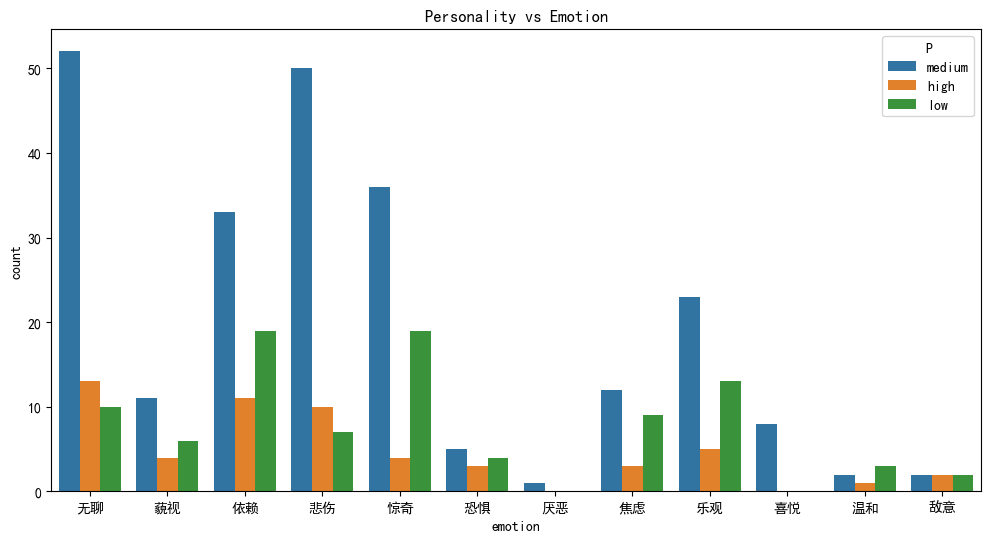

In [14]:
# 可视化一下new_table.csv中的数据
df_result =pd.read_csv('data/all_features_mapped.csv')
# 设置字体为 SimHei（黑体），确保系统中已安装该字体
plt.rcParams['font.sans-serif'] = ['SimHei']  # 替换为系统中存在的中文字体
plt.rcParams['axes.unicode_minus'] = False    # 正确显示负号


# feature是除了emotion和file和segment之外的所有列
features = df_result.columns.difference(['emotion', 'File', 'Segment'])
target = df_result['emotion']

# # 画出每个特征和emotion之间的关系
# for feature in features:
#     plt.figure(figsize=(12, 6))
#     sns.boxplot(x=target, y=feature, data=df_all)
#     plt.title(f'{feature} vs Emotion')
#     plt.show()
    
personality_group_p = df_result.groupby('P')
personality_group_e = df_result.groupby('E')
personality_group_n = df_result.groupby('N')



# 画出personality和emotion之间的关系，每个personality的emotion的分布在一个大图中
plt.figure(figsize=(12, 6))
sns.countplot(x='emotion', hue='P', data=df_result)
plt.title('Personality vs Emotion')
plt.show()






# # 画出年龄和emotion之间的关系
# plt.figure(figsize=(12, 6))
# sns.boxplot(x='emotion', y='age', data=df_result)
# plt.title('Age vs Emotion')
# plt.show()



### 聚类分析
- 先使用K-prototypes先把人根据人格，性别，年龄先分群，然后在每个簇里面找到香味-情绪的推荐规则。最后然后使用xgboost分类进行簇的推荐
- 聚类的时候首先通过cost函数找到最佳的簇数，然后再进行聚类
- 然后需要对每个簇进行推荐规则的制定，这里可以使用频数统计，相关性分析，显著性分析、然后将香味进行映射到情绪上

In [ ]:
df_cluster = pd.read_csv('data/all_features.csv')
df_cluster = df_cluster[['PP','A','D','E', 'N', 'P', 'sex','香味','emotion']]
#  删除香味那一列为o的行
df_cluster = df_cluster[df_cluster['香味'] != '0']
cluster_feature= ['E','N','P','sex']
df_cluster_cluster = df_cluster[cluster_feature]



# 导入DBSCAN 和 K-prototypes 算法
from kmodes.kprototypes import KPrototypes
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder


plt.rcParams['font.sans-serif'] = ['SimHei']  # 替换为系统中存在的中文字体
plt.rcParams['axes.unicode_minus'] = False    # 正确显示负号



# # 先使用K-prototypes算法
# k_values = range(3, 10)  # 这里示例 k=3 到 k=8
# costs = []

# for k in k_values:
#     # 每次循环都建一个 KPrototypes 实例
#     kp = KPrototypes(n_clusters=k, 
#                      init='Cao', 
#                      n_init=10,   # 多次随机初始化, 减少局部最优
#                      verbose=0)  # 设置为1可以观察详细迭代过程
    
#     # 注意: categorical=[3] 是指第3列(从0开始算)为分类列
#     # 如果实际数据结构不同, 请修改索引
#     cluster_labels = kp.fit_predict(df_cluster_cluster, categorical=[3])
    
#     # kp.cost_ 就是此轮聚类的代价(越小越好, 类似 "簇内距离平方和")
#     cost_value = kp.cost_
#     costs.append(cost_value)
    
#     print(f"k={k}, cost_={cost_value}")

# # 画出代价随着k值的变化
# plt.figure(figsize=(6,4))
# plt.plot(k_values, costs, marker='o')
# plt.title("Elbow Method using KPrototypes cost_")
# plt.xlabel("Number of clusters k")
# plt.ylabel("cost_ (lower is better)")
# plt.show()






# 从上图可以看出，k=6是一个比较好的选择
# 画出聚类结果
kp = KPrototypes(n_clusters=6, init='Cao', n_init=10, verbose=0)
cluster_labels = kp.fit_predict(df_cluster_cluster, categorical=[3])
df_cluster['cluster_label'] = cluster_labels
df_cluster_cluster['cluster_label'] = cluster_labels

import plotly.express as px

fig = px.scatter_3d(
    df_cluster_cluster,
    x='E',
    y='N',
    z='P',
    color='cluster_label',  # 用聚类标签着色
    title='3D Scatter with Clusters (color) and Sex (symbol)'
)
# fig.show()

fig.update_layout(
    width=1000,  # 图形宽度（像素）
    height=800,  # 图形高度（像素）
    title_font=dict(size=20),  # 调整标题字体大小
)

from dash import Dash, dcc, html

app = Dash()
app.layout = html.Div([
    dcc.Graph(figure=fig)
])

app.run_server(debug=True, use_reloader=False)  # Turn off reloader if inside Jupyter







C:\Users\16972\AppData\Local\Temp\ipykernel_19592\1181248528.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cluster_cluster['cluster_label'] = cluster_labels


#### 说明薄荷的变异性最高，然后簇1的

In [56]:
# Only select numeric columns for calculating mean and std
numeric_columns = ['PP', 'A', 'D']

#1. 首先计算每个cluster里面每个香味对应的PP,A,D三个维度的均值和标准差，然后使用表格展示
fragarance_stats = df_cluster.groupby(['cluster_label', '香味'])[numeric_columns].agg(['mean', 'std'])
# 整理为表格的形式
fragarance_stats = fragarance_stats.reset_index()

# Flatten the multi-level columns
fragarance_stats.columns = ['cluster_label', 'fragrance'] + [f"{col}_{stat}" for col, stat in fragarance_stats.columns[2:]]


# 现在我要根据标准差来判断变异性，找出每个簇里面变异性最稳定的香味和最不稳定的香味
for col in numeric_columns:
        # 计算变异性
        fragarance_stats[f"{col}_variation"] = np.abs(fragarance_stats[f"{col}_std"] / fragarance_stats[f"{col}_mean"])

fragarance_stats.head(10)
# 找出每个簇里面变异性最稳定的香味和最不稳定的香味
min_variations = {'PP_variation': {}, 'A_variation': {}, 'D_variation': {}}
max_variations = {'PP_variation': {}, 'A_variation': {}, 'D_variation': {}}
# 遍历不同的 cluster label
for cluster in fragarance_stats['cluster_label'].unique():
    cluster_data = fragarance_stats[fragarance_stats['cluster_label'] == cluster]
    
    # 找出每种 variation 的最小值及其对应的香味
    for variation in ['PP_variation', 'A_variation', 'D_variation']:
        min_value = cluster_data[variation].min()
        min_fragrance = cluster_data[cluster_data[variation] == min_value]['fragrance'].values[0]
        
        min_variations[variation][cluster] = min_fragrance
        
        max_value = cluster_data[variation].max()
        max_fragrance = cluster_data[cluster_data[variation] == max_value]['fragrance'].values[0]
        
        max_variations[variation][cluster] = max_fragrance
        
print(f"the min_variations are {min_variations}")
print(f"the max_variations are {max_variations}")



# 接下来我需要统计：1. 每个簇里面变异性最稳定的香味和最不稳定的香味；2. PP, A, D三个维度的最稳定和最不稳定的香味
cluster_fragrance_stats = pd.DataFrame()
for cluster in fragarance_stats['cluster_label'].unique():
    cluster_data = fragarance_stats[fragarance_stats['cluster_label'] == cluster]
    
    # 找出每种 variation 的最小值及其对应的香味
    for variation in ['PP_variation', 'A_variation', 'D_variation']:
        min_value = cluster_data[variation].min()
        min_fragrance = cluster_data[cluster_data[variation] == min_value]['fragrance'].values[0]
        
        max_value = cluster_data[variation].max()
        max_fragrance = cluster_data[cluster_data[variation] == max_value]['fragrance'].values[0]
        
        cluster_fragrance_stats = cluster_fragrance_stats.append(
                {
                        'cluster_label': cluster,
                        'min_fragrance': min_fragrance,
                        'max_fragrance': max_fragrance
                },
                ignore_index=True
        )
print(cluster_fragrance_stats)


        
        


the min_variations are {'PP_variation': {0: '无香', 1: '无香', 2: '柠檬', 3: '柠檬', 4: '薰衣草', 5: '薰衣草'}, 'A_variation': {0: '薄荷', 1: '柠檬', 2: '柠檬', 3: '无香', 4: '无香', 5: '薰衣草'}, 'D_variation': {0: '无香', 1: '柠檬', 2: '薰衣草', 3: '柠檬', 4: '薰衣草', 5: '薄荷'}}
the max_variations are {'PP_variation': {0: '薰衣草', 1: '薰衣草', 2: '无香', 3: '薰衣草', 4: '薄荷', 5: '柠檬'}, 'A_variation': {0: '薰衣草', 1: '薄荷', 2: '薄荷', 3: '柠檬', 4: '薰衣草', 5: '无香'}, 'D_variation': {0: '薰衣草', 1: '薰衣草', 2: '薄荷', 3: '无香', 4: '柠檬', 5: '柠檬'}}


AttributeError: 'DataFrame' object has no attribute 'append'